# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [2]:
import pandas as pd

# Load the datasets
alldata = pd.read_excel('alldata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')

# Display the first few rows of each dataset to understand their structures
print("Responses Data (alldata):")
print(alldata.head())

print("\nDR Questions (drq):")
print(drq.head())

print("\nTV2 Questions (tv2q):")
print(tv2q.head())

print("\nColumns in DR Questions:")
print(drq.columns.tolist())

print("\nColumns in TV2 Questions:")
print(tv2q.columns.tolist())

# Define the response columns
response_columns = ['1a', '1b', '2a', '2b', '3a', '3b', 
                    '4a', '4b', '5a', '5b', '6a', '6b', 
                    '7a', '7b', '8a', '8b', '9a', '9b', 
                    '10a', '10b', '11a', '11b', '12a', '12b']

# Drop rows with missing values in response columns
cleaned_alldata = alldata.dropna(subset=response_columns)

# Check for missing values
print("\nMissing values in cleaned alldata:")
print(cleaned_alldata.isnull().sum())

# Check for missing values in question datasets
print("\nMissing values in DR Questions:")
print(drq.isnull().sum())

print("\nMissing values in TV2 Questions:")
print(tv2q.isnull().sum())


Responses Data (alldata):
   530  531  533  534  535  537  538  540  541  543  ...  9a  9b  10a  10b  \
0   -1   -2    1   -2    2    1   -2    1    1    2  ...   2   0    1   -2   
1    2    2   -1   -2   -1   -2    1   -2    2   -2  ...  -2   0   -1    2   
2    2    1   -2   -2    1   -2    1   -1    1   -1  ...  -1  -2    0    2   
3    2    1   -2   -1    1    1    1    1    1   -2  ...  -2   2    2    2   
4    1    1   -2    2   -2    1   -2    1    2   -2  ...  -2   0   -1    0   

   11a  11b  12a  12b               storkreds  alder  
0   -2    1    1    1    Københavns Storkreds     78  
1    1   -2    0    0          Fyns Storkreds     64  
2    0   -1    1   -2     Bornholms Storkreds     37  
3    2   -1    2    0  Nordjyllands Storkreds     28  
4   -2    0    2   -2    Københavns Storkreds     58  

[5 rows x 53 columns]

DR Questions (drq):
    ID                     Title  \
0  530           KLIMA OG ENERGI   
1  531  ARBEJDSMARKED OG ØKONOMI   
2  533              RET

In [ ]:
import pandas as pd

# Sample initialization 


# Create long_alldata by melting cleaned_alldata
long_alldata = pd.melt(cleaned_alldata, id_vars=['navn', 'parti', 'storkreds', 'alder'], 
                       value_vars=response_columns, 
                       var_name='question_id', 
                       value_name='response')

# Extract numeric part of question_id as string 
long_alldata['question_id'] = long_alldata['question_id'].str.extract(r'(\d+)')[0].astype(str)

#  Check the updated types
print("Updated question_id types:")
print(long_alldata[['question_id']].dtypes)

#  Ensure ID in DR Questions is of type string

drq['ID'] = drq['ID'].astype(str)

# Merge with DR Questions
merged_dr = long_alldata.merge(drq, left_on='question_id', right_on='ID', how='left')

# Display merged data
print("Merged Responses with DR Questions:")
print(merged_dr.head())


Updated question_id types:
question_id    object
dtype: object
Merged Responses with DR Questions:
                       navn                    parti               storkreds  \
0      Lars Philipsen Prahm              Moderaterne    Københavns Storkreds   
1             Karsten Hønge  Socialistisk Folkeparti          Fyns Storkreds   
2  Martin Kelleher-Petersen             Alternativet     Bornholms Storkreds   
3    Nicklas Gjedsig Larsen             Alternativet  Nordjyllands Storkreds   
4            Tom Gillesberg                Løsgænger    Københavns Storkreds   

   alder question_id  response   ID Title Question  Info ArgumentFor  \
0     78           1         0  NaN   NaN      NaN   NaN         NaN   
1     64           1         1  NaN   NaN      NaN   NaN         NaN   
2     37           1         1  NaN   NaN      NaN   NaN         NaN   
3     28           1         2  NaN   NaN      NaN   NaN         NaN   
4     58           1        -2  NaN   NaN      NaN   NaN    

Unique question_id in long_alldata: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
Unique ID in drq: ['530' '531' '533' '534' '535' '537' '538' '540' '541' '543' '544' '545'
 '546' '547' '548' '550' '551' '552' '553' '555' '556' '557' '559' '561'
 '563']
Unmatched entries:
                           navn                    parti  \
0          Lars Philipsen Prahm              Moderaterne   
1                 Karsten Hønge  Socialistisk Folkeparti   
2      Martin Kelleher-Petersen             Alternativet   
3        Nicklas Gjedsig Larsen             Alternativet   
4                Tom Gillesberg                Løsgænger   
...                         ...                      ...   
20803               Maria Gudme        Socialdemokratiet   
20804             Maria Durhuus        Socialdemokratiet   
20805            Morten Bødskov        Socialdemokratiet   
20806               Jeppe Bruus        Socialdemokratiet   
20807             Gunvor Wibroe        Socialdemokratiet   


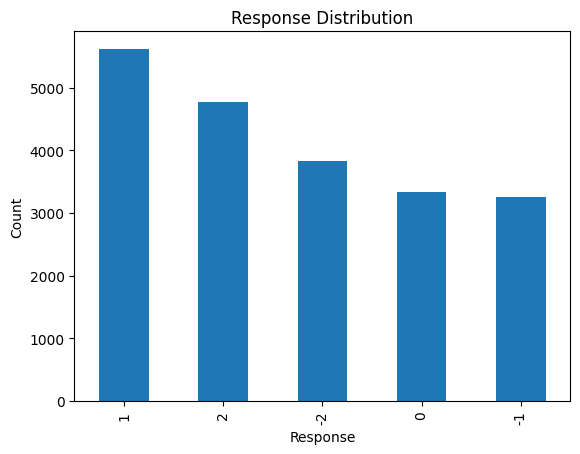

In [ ]:
print("Unique question_id in long_alldata:", long_alldata['question_id'].unique())
print("Unique ID in drq:", drq['ID'].unique())
unmatched = merged_dr[merged_dr['ID'].isnull()]
print("Unmatched entries:")
print(unmatched)
# Check the distribution of responses
response_distribution = merged_dr['response'].value_counts()
print("Response Distribution:")
print(response_distribution)

# Plot the response distribution
import matplotlib.pyplot as plt

response_distribution.plot(kind='bar')
plt.title('Response Distribution')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


Average Response by Party:
parti
Alternativet                                   0.401741
Danmarksdemokraterne                           0.050676
Dansk Folkeparti                               0.264456
Det Konservative Folkeparti                    0.075255
Enhedslisten                                   0.204392
Frie Grønne, Danmarks Nye Venstrefløjsparti    0.391026
Kristendemokraterne                            0.377976
Liberal Alliance                              -0.114286
Løsgænger                                     -0.027778
Moderaterne                                    0.346230
Nye Borgerlige                                -0.013072
Radikale Venstre                               0.274254
Socialdemokratiet                              0.237548
Socialistisk Folkeparti                        0.422024
Venstre                                        0.146825
Name: response, dtype: float64
Average Response by Age Group:
age_group
(0, 18]     -0.194444
(18, 30]     0.243391
(30, 40]   

C:\Users\Bruger\AppData\Local\Temp\ipykernel_16296\2469814552.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response = merged_dr.groupby('age_group')['response'].mean()


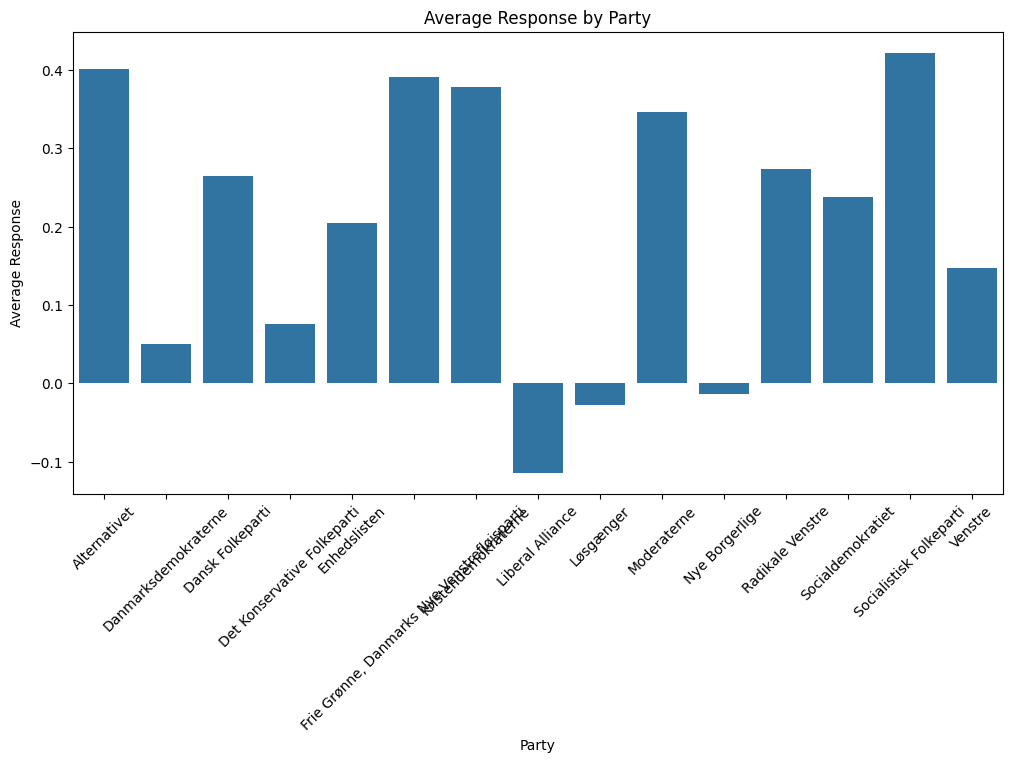

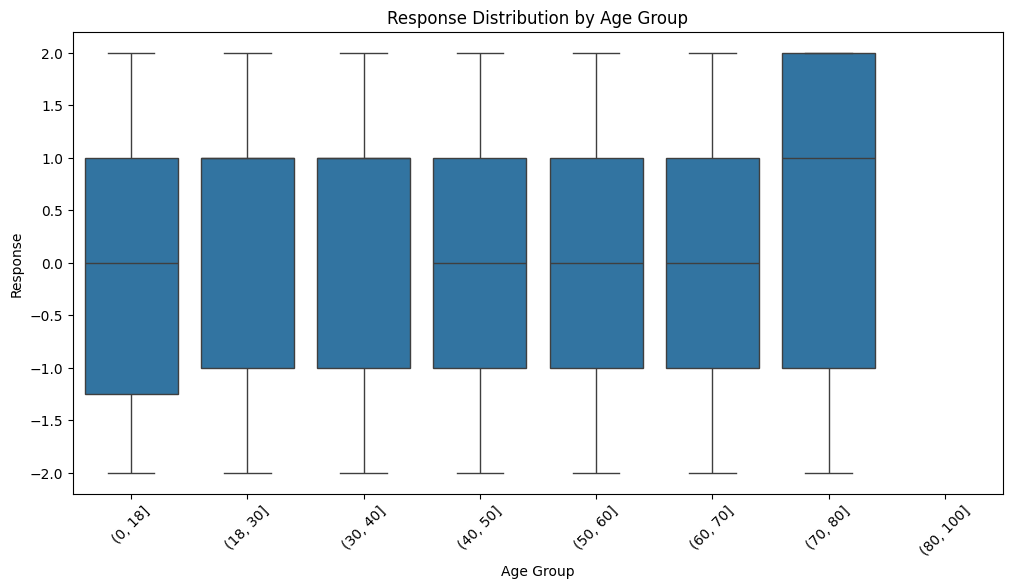

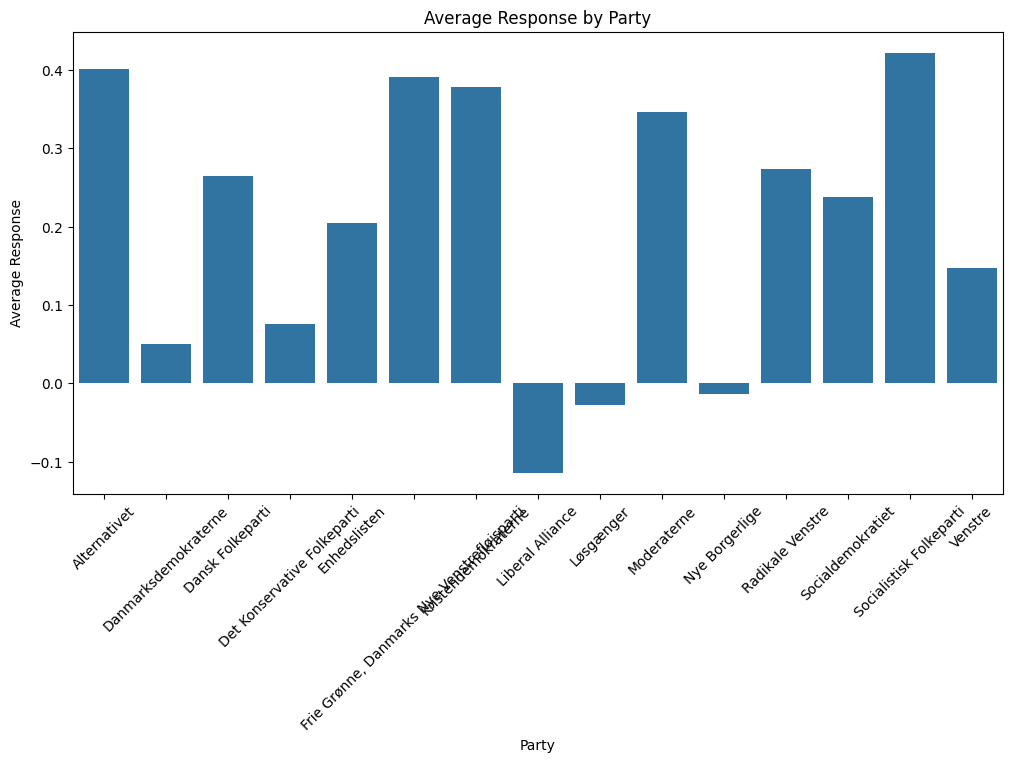

Missing Data Summary:
navn                            0
parti                           0
storkreds                       0
alder                           0
question_id                     0
response                        0
ID                          20808
Title                       20808
Question                    20808
Info                        20808
ArgumentFor                 20808
ArgumentAgainst             20808
WordMerger                  20808
ID_CandidateQuestionType    20808
Rule                        20808
QuestionListData            20808
age_group                     384
dtype: int64


In [ ]:
party_response = merged_dr.groupby('parti')['response'].mean()
print("Average Response by Party:")
print(party_response)
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]  # Define age bins
merged_dr['age_group'] = pd.cut(merged_dr['alder'], bins=age_bins)
age_response = merged_dr.groupby('age_group')['response'].mean()
print("Average Response by Age Group:")
print(age_response)
import seaborn as sns

# Bar plot for average response by party
plt.figure(figsize=(12, 6))
sns.barplot(x=party_response.index, y=party_response.values)
plt.title('Average Response by Party')
plt.xlabel('Party')
plt.ylabel('Average Response')
plt.xticks(rotation=45)
plt.show()

# Box plot for responses by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='response', data=merged_dr)
plt.title('Response Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Response')
plt.xticks(rotation=45)
plt.show()

# Average response by party
party_response = merged_dr.groupby('parti')['response'].mean()

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x=party_response.index, y=party_response.values)
plt.title('Average Response by Party')
plt.xlabel('Party')
plt.ylabel('Average Response')
plt.xticks(rotation=45)
plt.show()

# Check for missing data in merged DataFrame
missing_data_summary = merged_dr.isnull().sum()
print("Missing Data Summary:")
print(missing_data_summary)


Top Questions by Average Response:
   question_id      mean       std
10           8  0.817186  0.935005
4            2  0.567474  1.332190
6            4  0.506344  1.288555
1           10  0.428489  1.439416
9            7  0.375433  1.420441
5            3  0.310842  1.543644
3           12  0.117647  1.251427
0            1 -0.017878  1.465992
2           11 -0.068051  1.674280
8            6 -0.121684  1.610218


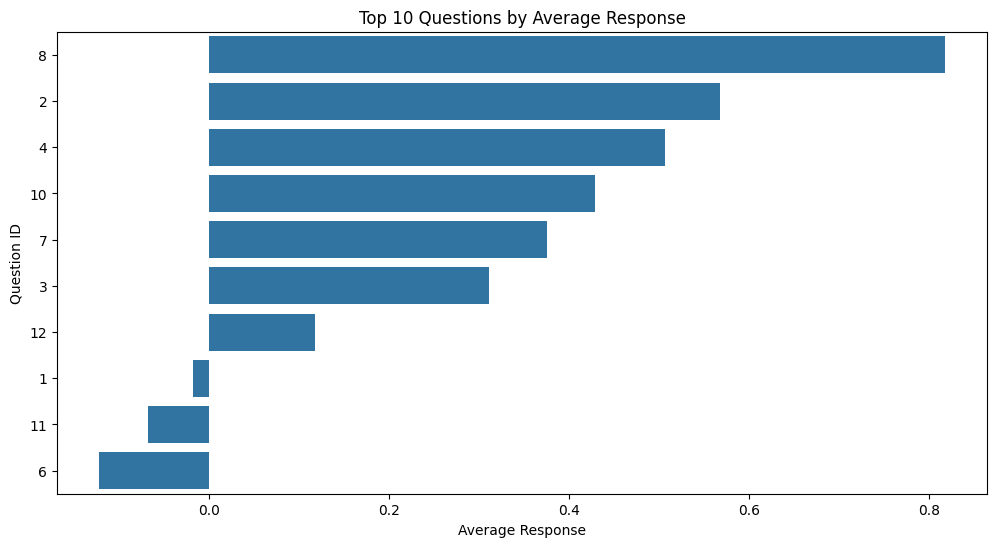

In [11]:
# Calculate average response for each question
question_stats = merged_dr.groupby('question_id')['response'].agg(['mean', 'std']).reset_index()
question_stats = question_stats.sort_values(by='mean', ascending=False)

# Display the top questions
print("Top Questions by Average Response:")
print(question_stats.head(10))

# Plotting the average responses
plt.figure(figsize=(12, 6))
sns.barplot(x='mean', y='question_id', data=question_stats.head(10))
plt.title('Top 10 Questions by Average Response')
plt.xlabel('Average Response')
plt.ylabel('Question ID')
plt.show()


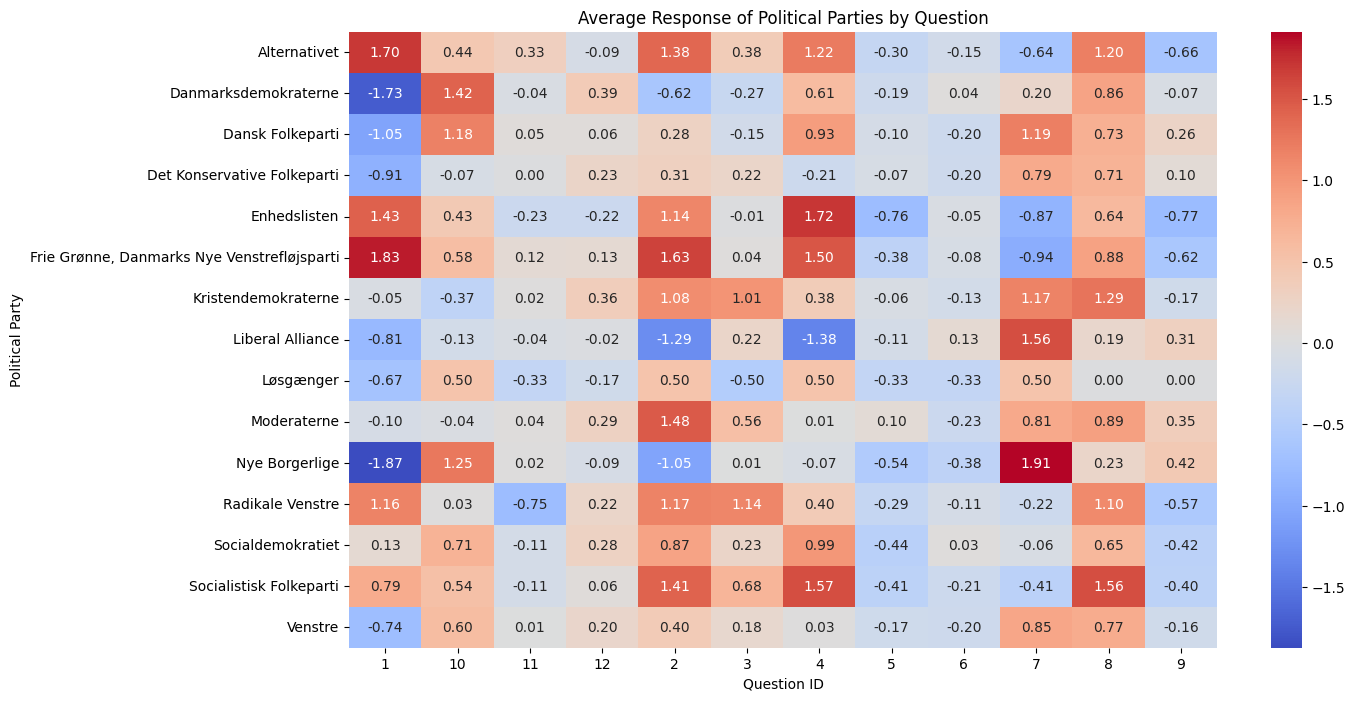

In [12]:
# Calculate average response by party for each question
party_question_avg = merged_dr.groupby(['parti', 'question_id'])['response'].mean().unstack()

# Plotting using a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(party_question_avg, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average Response of Political Parties by Question')
plt.xlabel('Question ID')
plt.ylabel('Political Party')
plt.show()


Shape of clustering data: (15, 12)


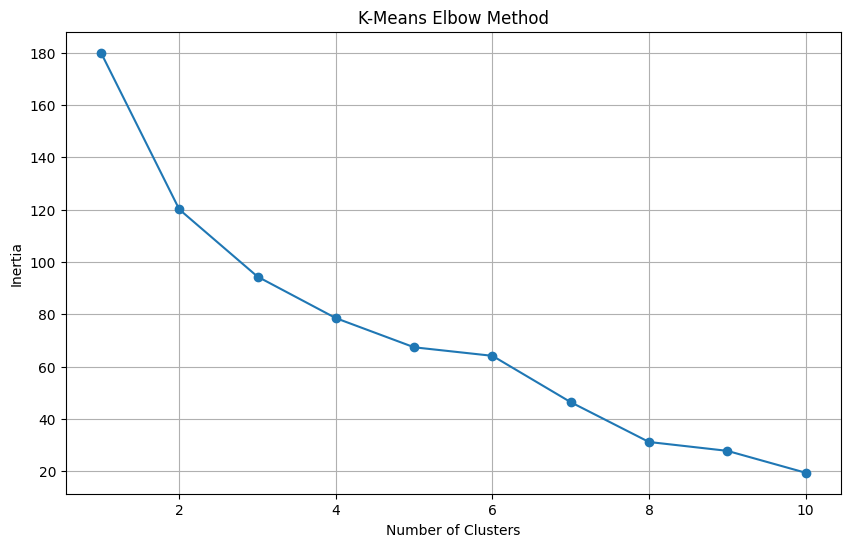

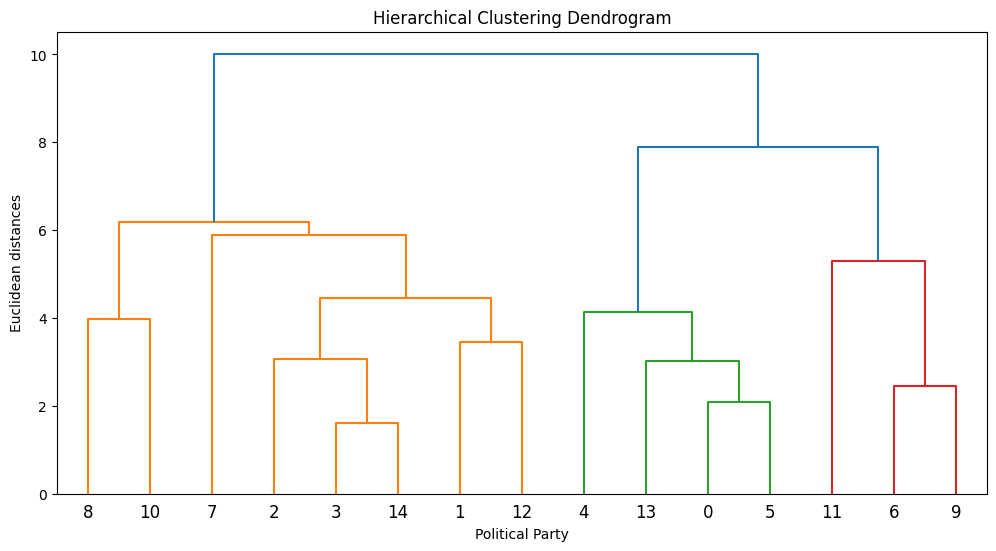

DBSCAN Cluster Counts:
-1    15
Name: count, dtype: int64


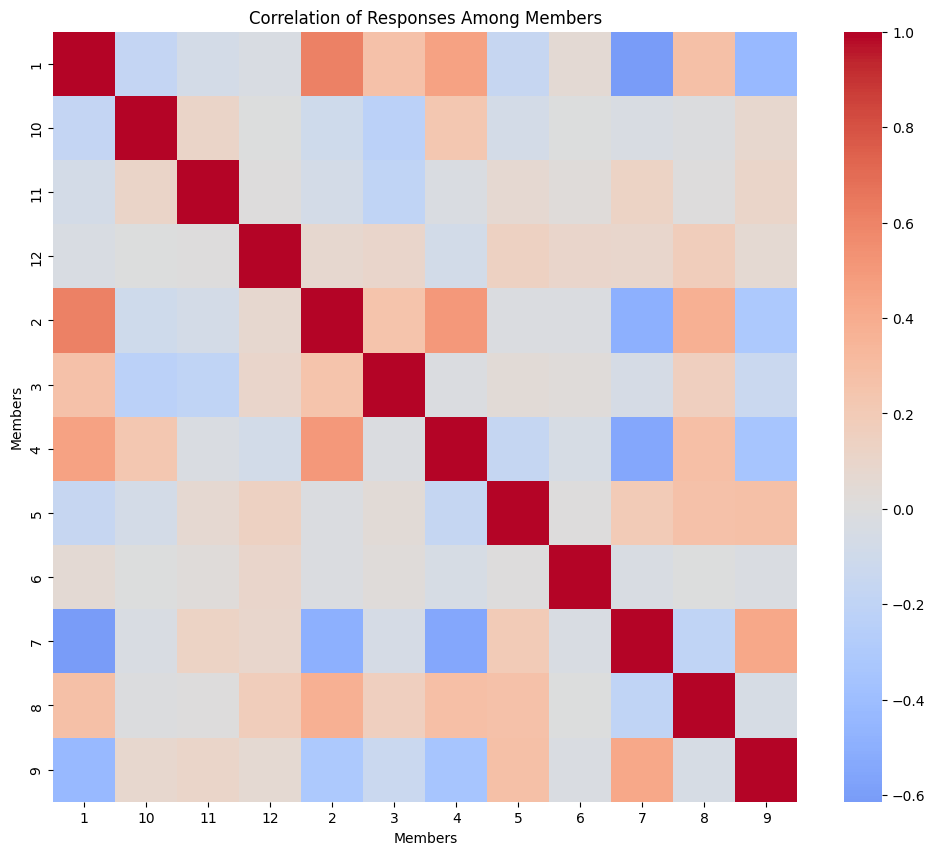

In [14]:
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering
clustering_data = merged_dr.pivot_table(index='parti', columns='question_id', values='response').fillna(0)
scaled_data = StandardScaler().fit_transform(clustering_data)

# Check the shape of the data
print("Shape of clustering data:", scaled_data.shape)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()
import scipy.cluster.hierarchy as sch

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Political Party')
plt.ylabel('Euclidean distances')
plt.show()
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Count members in each cluster
print("DBSCAN Cluster Counts:")
print(pd.Series(dbscan_labels).value_counts())
# Calculate pairwise correlation of responses
correlation_matrix = merged_dr.pivot_table(index='navn', columns='question_id', values='response').corr()

# Plotting correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation of Responses Among Members')
plt.xlabel('Members')
plt.ylabel('Members')
plt.show()
